### Entire Machine Learning Applied for Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv('dataset.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# Rare category grouping column
a = df1['area_type'].value_counts()
b = df1['availability'].value_counts()
c = df1['society'].value_counts()
d = df1['location'].value_counts()

print(f"""
{a}
X------X
{b}      
X------X
{c}
X------X
{d}
""")


Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
X------X
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64      
X------X
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64
X------X
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage 

In [4]:
# Scaling Numeric Columns
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
# Check Missing Values
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['bhk'] = df3['size'].apply(lambda x: x.split(' ')[0])
df3.head()

C:\Users\Pragyan\AppData\Local\Temp\ipykernel_24348\853640821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: x.split(' ')[0])


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
# Exploring total_sqft feature
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def is_float(x) :
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [14]:
def range_to_avg(x):
    try:
        parts = x.split('-')
        if len(parts) == 2:
            low = float(parts[0].strip())
            high = float(parts[1].strip())
            return (low + high) / 2
        return float(x.strip())
    except:
        return None


In [15]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(range_to_avg)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


#### Feature Engineering

In [16]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100 / df5['total_sqft']

In [17]:
df5['location'] = df5['location'].apply(lambda x : x.strip())
loc_stats = df5['location'].value_counts()

In [18]:
loc_stats_less_than_10 = loc_stats[loc_stats <= 10]

In [19]:
len(loc_stats_less_than_10)

1052

In [20]:
df5['location'] = df5['location'].apply(lambda x : 'other' if x in loc_stats_less_than_10 else x)
len(df5['location'].unique())

242

<Axes: >

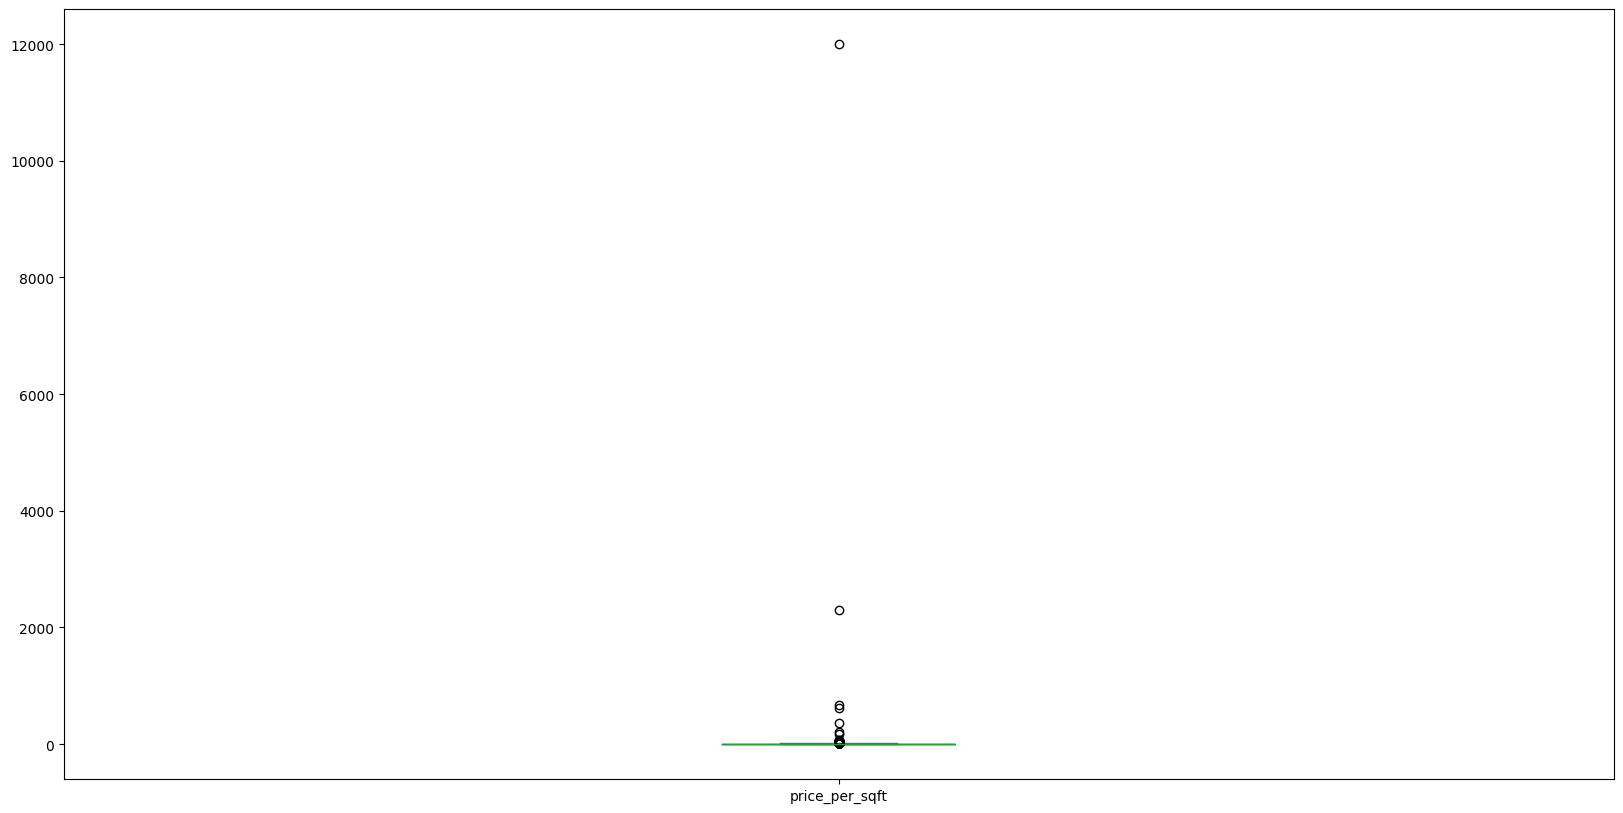

In [21]:
# Outlier Removal
df5['price_per_sqft'].plot.box()

In [22]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = subdf['price_per_sqft'].mean()
        st = subdf['price_per_sqft'].std()
        mask = (subdf['price_per_sqft'] > (m - st)) & (subdf['price_per_sqft'] < (m + st))
        reduced_df = subdf[mask]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out


In [23]:
df6 = remove_pps_outliers(df5)
df6.shape

(11477, 7)

In [24]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15.017544
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11.901840
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.0,6,10.416667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12.533333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.0,7,9.139785


In [25]:
def plot_ppsf_vs_sqft(df, location,
                      size_col='size',
                      sqft_col='total_sqft',
                      ppsf_col='price'):
    """
    Plots price_per_sqft vs total_sqft for 2 BHK and 3 BHK at a given location.
    Works whether you have a numeric 'bhk' column or a text 'size' like '2 BHK'.
    """
    from matplotlib.ticker import MultipleLocator
    
    sub = df[df['location'] == location].copy()
    if sub.empty:
        raise ValueError(f"No rows for location: {location}")

    # Ensure a numeric BHK column
    if 'bhk' in sub.columns:
        sub['bhk'] = pd.to_numeric(sub['bhk'], errors='coerce')
    else:
        sub['bhk'] = (
            sub[size_col].astype(str)
            .str.extract(r'(\d+)')[0]
            .astype(float)
        )

    # Keep needed columns and drop NAs
    cols_needed = [sqft_col, ppsf_col, 'bhk']
    sub = sub[cols_needed].dropna()

    two = sub[sub['bhk'] == 2]
    three = sub[sub['bhk'] == 3]

    if two.empty or three.empty:
        print("Warning: missing data for 2 BHK or 3 BHK at this location.")

    plt.figure()
    plt.scatter(two[sqft_col], two[ppsf_col], label='2 BHK', marker='o', alpha=0.7, color='blue')
    plt.scatter(three[sqft_col], three[ppsf_col], label='3 BHK', marker='x', alpha=0.7, color='green')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(400))
    ax.xaxis.set_minor_locator(MultipleLocator(100))
    plt.xticks(rotation=45)
    plt.xlabel('Total Sqft')
    plt.ylabel('Price per Sqft')
    plt.title(f'{location}')
    plt.legend()
    plt.grid(True)
    plt.show()

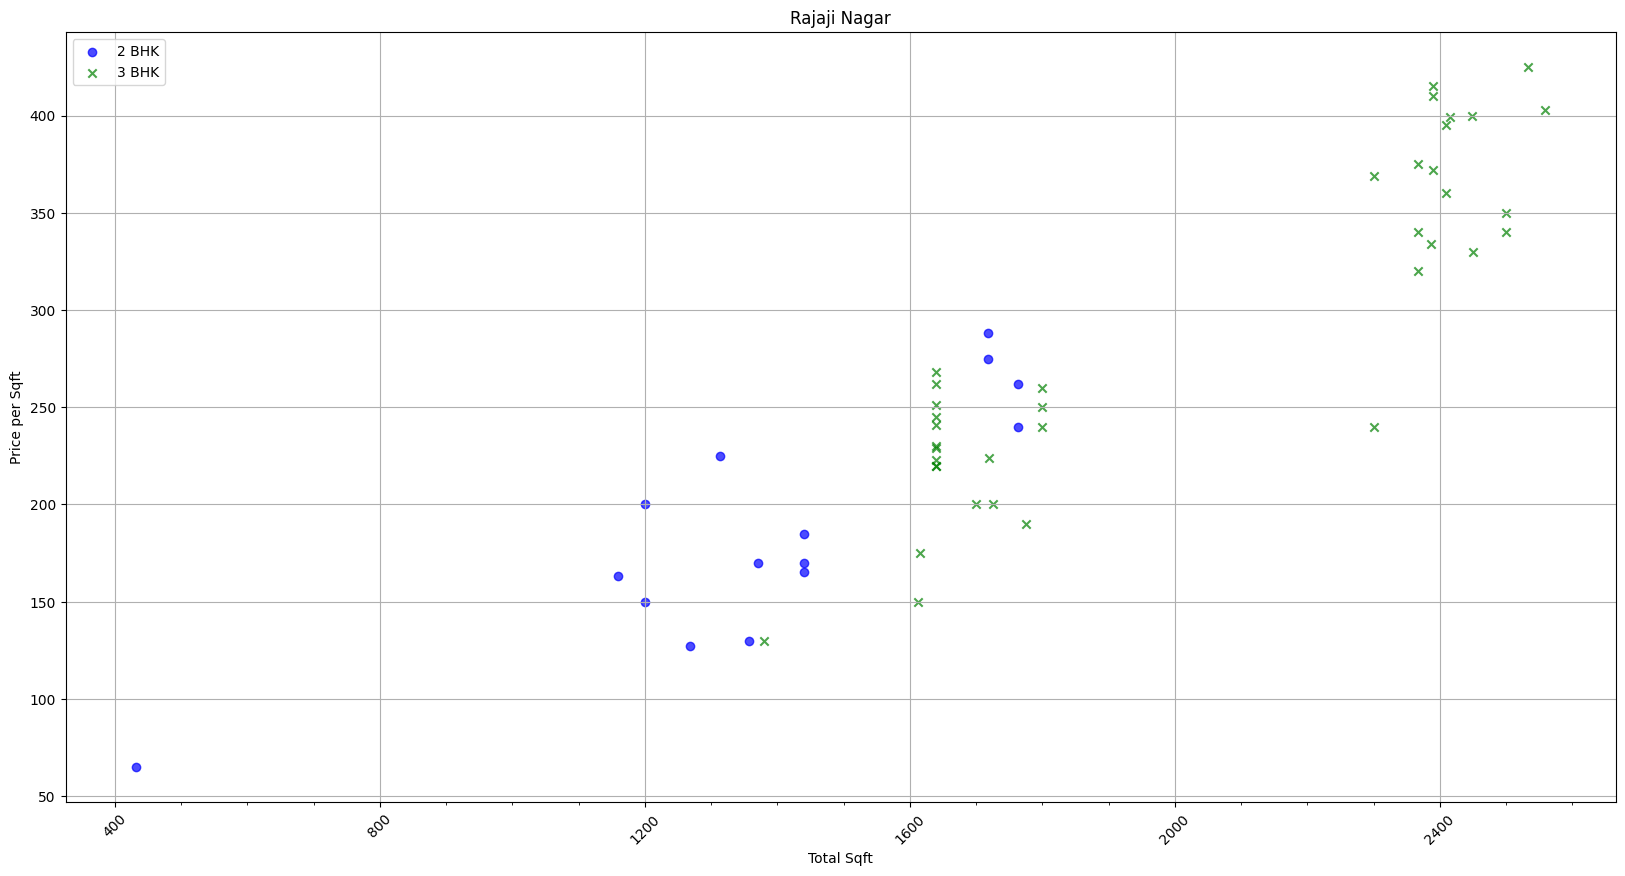

In [26]:
plot_ppsf_vs_sqft(df6, 'Rajaji Nagar')

In [27]:
def remove_bhk_outliers(df):
    df = df.copy()
    df['bhk'] = pd.to_numeric(df['bhk'], errors='coerce')
    exclude_indices = np.array([], dtype=int)
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[int(bhk)] = {
                'mean': bhk_df.price_per_sqft.mean(),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk = int(bhk)
            prev_stats = bhk_stats.get(bhk - 1)
            if prev_stats and prev_stats['count'] > 5:
                to_exclude = bhk_df[bhk_df.price_per_sqft < prev_stats['mean']].index.values
                exclude_indices = np.append(exclude_indices, to_exclude)

    return df.drop(exclude_indices, axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(8045, 7)

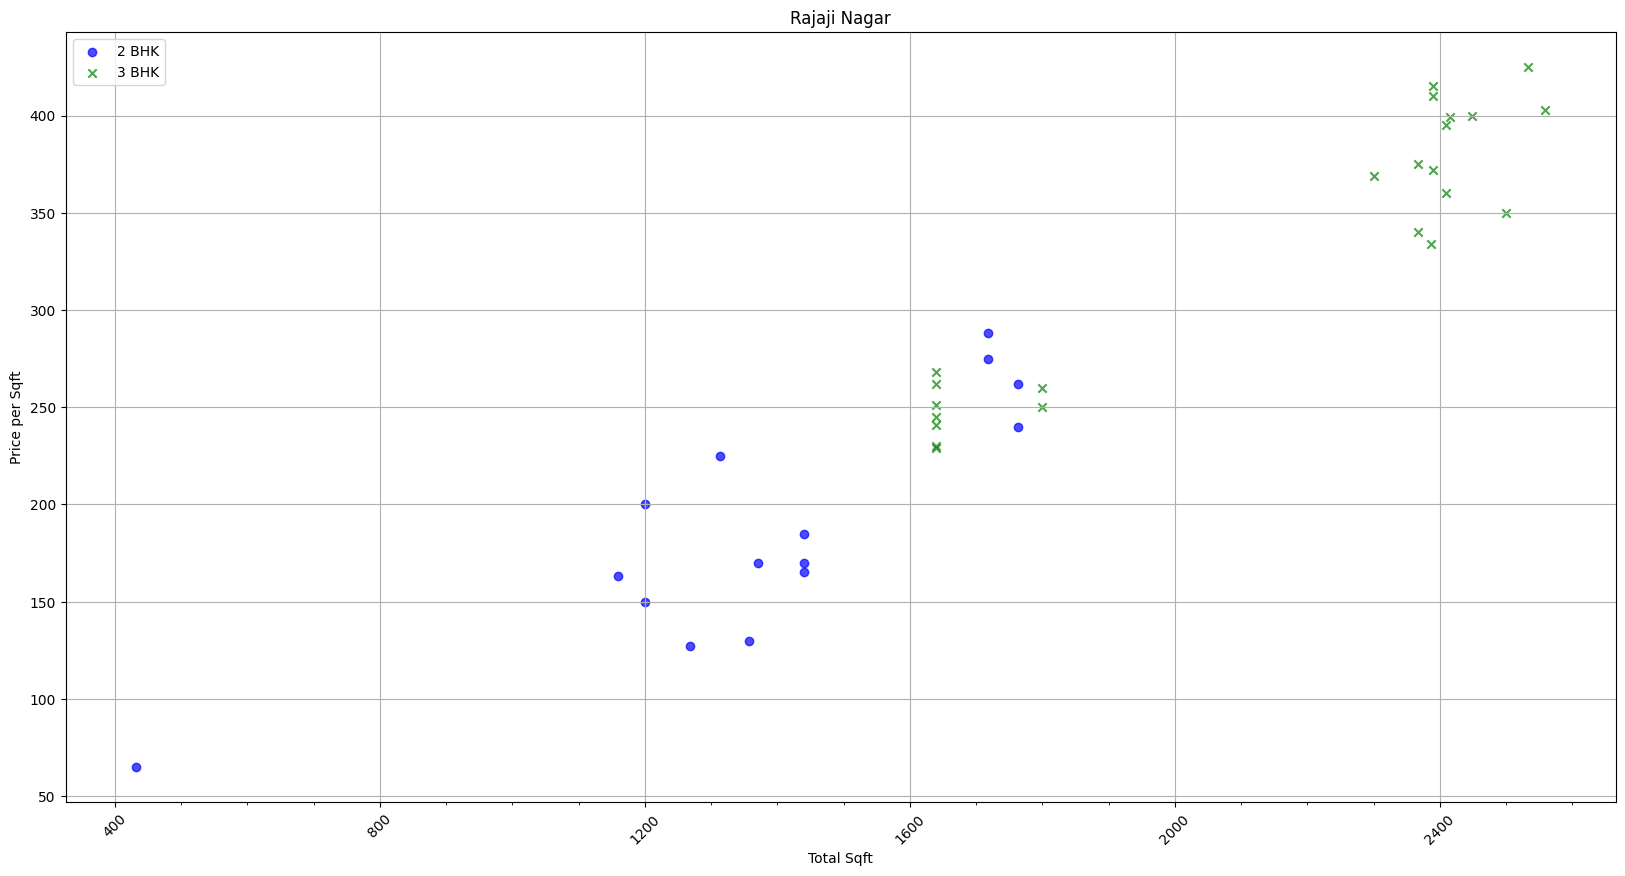

In [28]:
plot_ppsf_vs_sqft(df7, 'Rajaji Nagar')

In [29]:
df8 = df7[df7['bath'] < df7['bath'] + 2]
df8.shape

(8045, 7)

In [30]:
df9 = df8.drop(['size', 'price_per_sqft'], axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7


#### Model Building

In [31]:
dummies = pd.get_dummies(df9['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df10 = pd.concat([df9, dummies.drop('other', axis='columns')], axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df11 = df10.drop('location', axis = 'columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,85.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X = df11.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y = df11['price']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [42]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7664641457015773

In [43]:
# k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.67274348, 0.7314497 , 0.71187496, 0.6561976 , 0.62620527])

In [47]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_grid_search_CV(X, y):
    algos = {
        'Linear Regression' : {
            'model' : LinearRegression(),
            'params' : {
                'n_jobs' : [10, 20]
            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'acyclic']
            }
        },
        'DecisionTree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items() :
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
        

In [48]:
find_best_model_using_grid_search_CV(X,y)

C:\Users\Pragyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pragyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pragyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

,model,best_score,best_params
0,Linear Regression,0.679694,{'n_jobs': 10}
1,Lasso,0.596375,"{'alpha': 2, 'selection': 'random'}"
2,DecisionTree,0.403519,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [49]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [50]:
import pickle
with open('bangalore_home_price_model.pickle', 'wb') as f :
    pickle.dump(lr_clf, f)

In [51]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))